# Regresión Lineal

## ¿Qué es?

Es una técnica que nos ayuda a hacer comparaciones entre los puntos en el plano cartesiano. es decir, que para un valor de X existe un valor de Y, esto se empieza a graficar sobre el plano como un grafico de dispersión

Para esos datos, hay que ajustar una linea recta que mejor los entienda, ósea el modelo trata de predecir el mejor ajuste para la linea recta en esos datos.

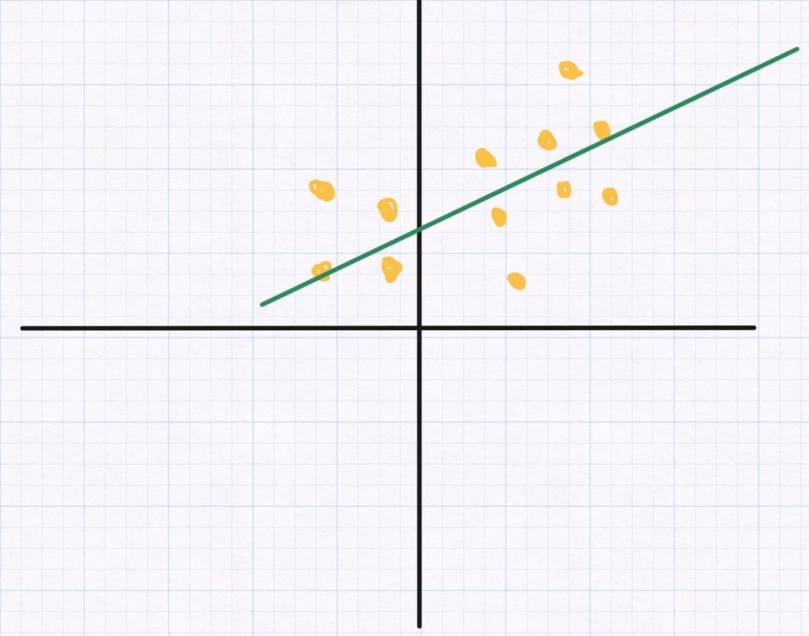

La función matemática correspondiente a este problema es $Y=w_0 + w_1x$

- X es un valor que existe sobre el plano
- $W_0$ es el punto que se esta cortando sobre el plano, es decir, cuando $X = 0$ cual es el salto que existe el punto de $X = 0$ y el plano en el eje Y, en otras palabras, el intercepto.

- $W_1$ es cuando se agrega un valor a la X cuanto salto sobre Y
Básicamente esto se conoce como w0 el Intercepto y w1 la pendiente de la linea recta.

Durante el ajuste del modelo de regresión lineal se conocen como los pesos del modelo, estos son los valores que va a estar intentando aprender el modelo para entender cual va a ser la mejor linea recta que se va a ajustar a los datos.

## ¿Cuándo utilizarlo?

1) Si la variable dependiente es numérica
2) La mayoría de variables independientes son numéricas
3) Si no cuanto con muchas categorías en las variables categóricas

## Recomendaciones

1) Si el target es numérico se puede empezar intentando hacer una regresión lineal, ya que no es muy complejo a nivel computacional.
2) Redicir las variables lo más que se pueda
3) Tener cuidado con la multicolinealidad
4) No hacer predicciones fuera del dominio

## Pasos para un algoritmo

1) Se ajusta el modelo
2) Se comparan resultados con los reales
3) Se ajustan pesos en el modelo
4) Regreso a paso inicial si no se converge

## Función de pérdida

![minimos cuadrados](https://anestesiar.org/WP/uploads/2020/04/regresi%C3%B3n-lineal_formula-5.jpg)

Se usa el método de mínimos cuadrados, para este se necesita varios supuesto, como linealidad, normalidad y homocedasticidad. Este método busca minimizar el error (o distancia) entre la recta y los puntos reales

Una de las métricas de evaluación es el MSE (Mean Square Error), si esta en un principio nos da un valor malo (muy grande), el modelo no se está ajustando

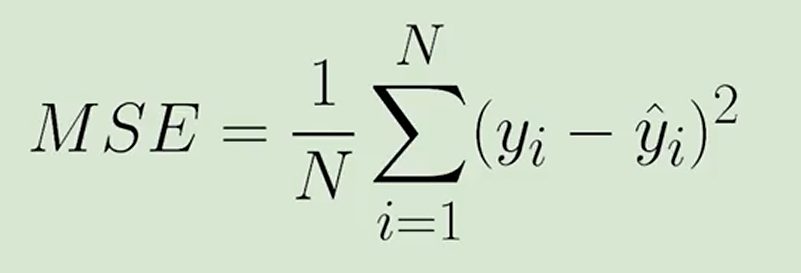

El $R^2$ es un coeficiente de determinación intenta mostrar que tan bien se ajusta el modelo con base a la varianza de los datos, mientras más se acerque a 1, tiende a ser mejor.

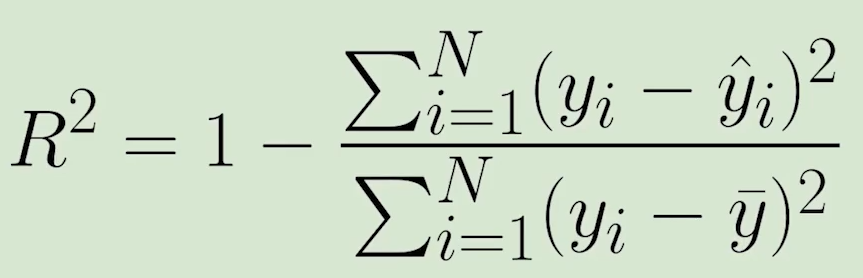

## Algoritmo de optimización



## Aplicación

### Librerías

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

### Importando los [datos](https://static.platzi.com/media/public/uploads/housing_edf82b23-51e2-4f57-887d-6be67da34d27.data)

- CRIM: tasa de delincuencia per cápita por ciudad

- ZN: proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados

- INDUS: proporción de acres de negocios no minoristas por ciudad

- CHAS: variable ficticia del río Charles (= 1 si la parcela limita con el río; 0 en caso contrario)

- NOX: concentración de óxidos nítricos (partes por cada 10 millones)

- RM: número promedio de habitaciones por vivienda

- AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

- DIS: distancias ponderadas a cinco centros de empleo de Boston

- RAD: índice de accesibilidad a carreteras radiales

- TAX: tasa de impuesto sobre la propiedad de valor total por cada $10,000

- PTRATIO: relación alumno-maestro por ciudad

- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

- LSTAT: % de estatus social bajo de la población

- MEDV: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

In [3]:
df = pd.read_csv("./data/housing.data", header=None, sep="\s+",
                names=["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"])
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

#### Entendiendo los datos

In [4]:
sns.set_style("whitegrid")
sns.set_context("notebook")

Elegir las columnas principales

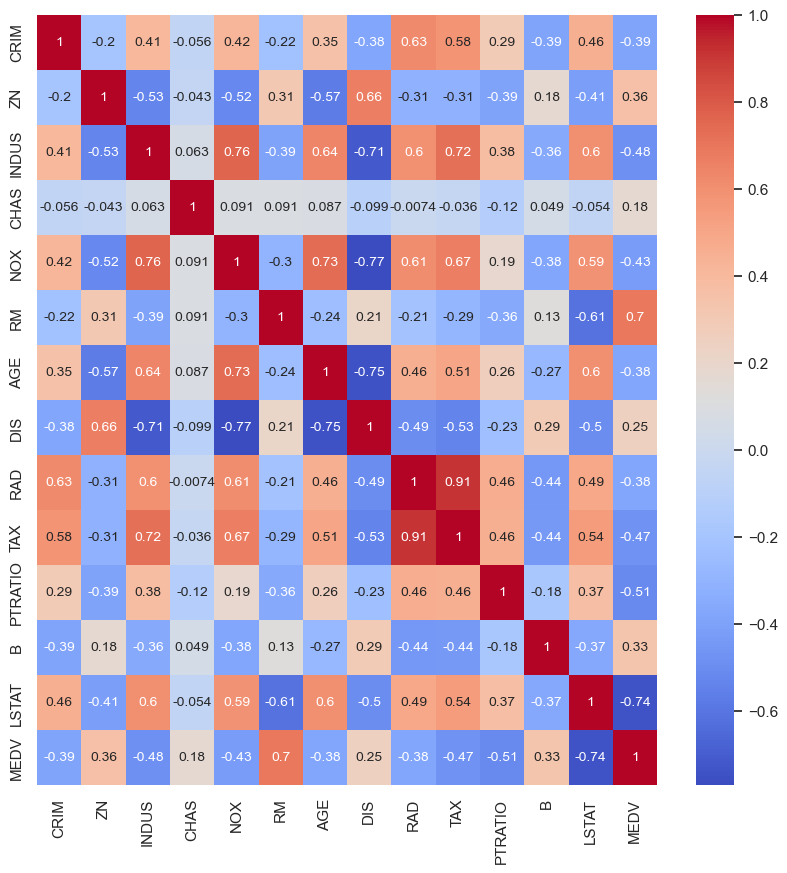

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True, annot_kws={"fontsize":"small"})
plt.show()

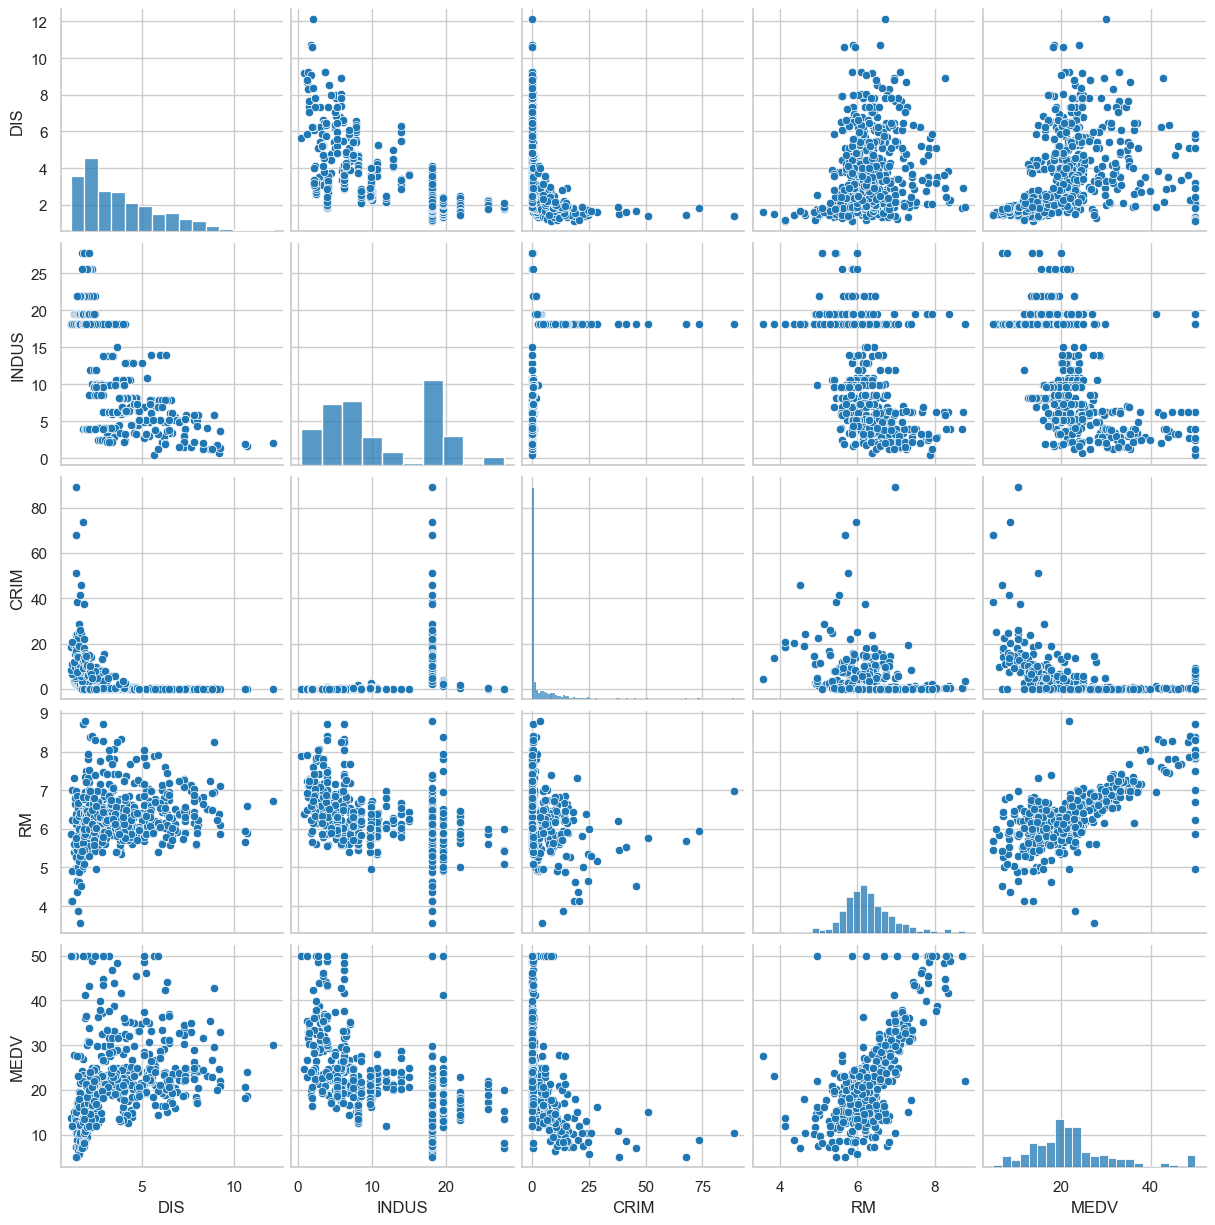

In [6]:
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]
sns.pairplot(df[cols], height=2.5)
plt.show()

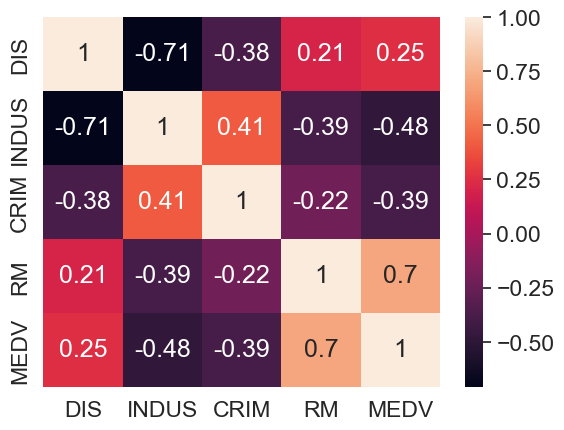

In [7]:
sns.set(font_scale = 1.5)
sns.heatmap(df[cols].corr(), cbar = True, annot=True, yticklabels=cols, xticklabels=cols);

### Entrenando un modelo

Recordemos que un modelo utiliza puntos reales para ajustar una linea recta entre los puntos para predecir datos

#### Creando el modelo

In [8]:
from sklearn.preprocessing import StandardScaler # Permite escalar los datos para que el modelo se ajuste mejor
from sklearn.linear_model import LinearRegression

In [9]:
X = df["RM"].values
y = df["MEDV"].values

Estandarizar datos

In [10]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X.reshape(-1, 1))
y_std = sc_y.fit_transform(y.reshape(-1, 1))


In [11]:
pd.DataFrame(dict(X=X,X_std=X_std.reshape(506,)
                  ,y=y,y_std=y_std.reshape(506,))).head()

X     X_std     y     y_std
0  6.575  0.413672  24.0  0.159686
1  6.421  0.194274  21.6 -0.101524
2  7.185  1.282714  34.7  1.324247
3  6.998  1.016303  33.4  1.182758
4  7.147  1.228577  36.2  1.487503

In [12]:
slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

#### Análisis de resultados

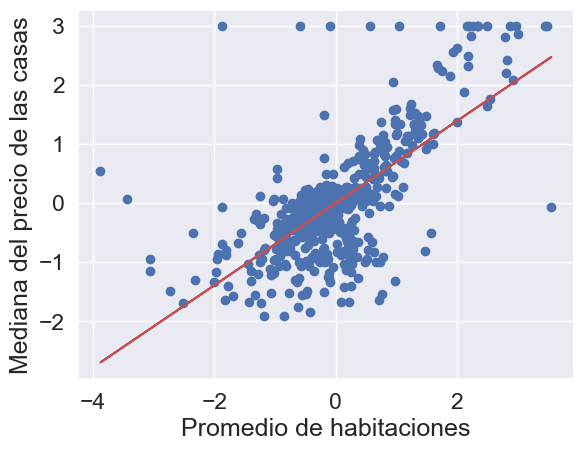

In [13]:
plt.scatter(X_std, y_std)
plt.plot(X_std, slr.predict(X_std), color="r") # Recordemos que estos son los estandarizados
plt.ylabel("Mediana del precio de las casas")
plt.xlabel("Promedio de habitaciones")
plt.show()

#### Generando predicciones

In [14]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1, 1))

In [15]:
slr.predict(num_habitaciones_std) # Este valor aún está standarizado

array([[-1.2726238]])

In [16]:
sc_y.inverse_transform(slr.predict(num_habitaciones_std)) # Desestanzarizar

array([[10.83992413]])

### Multivariable

$$\hat{y}=w_0+w_1*x_1+\dots +w_n*x_n$$

In [17]:
df = pd.read_csv("./data/housing.data", header=None, sep="\s+",
                names=["CRIM","ZN","INDUS", "CHAS","NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"])
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

Recordemos las relaciones

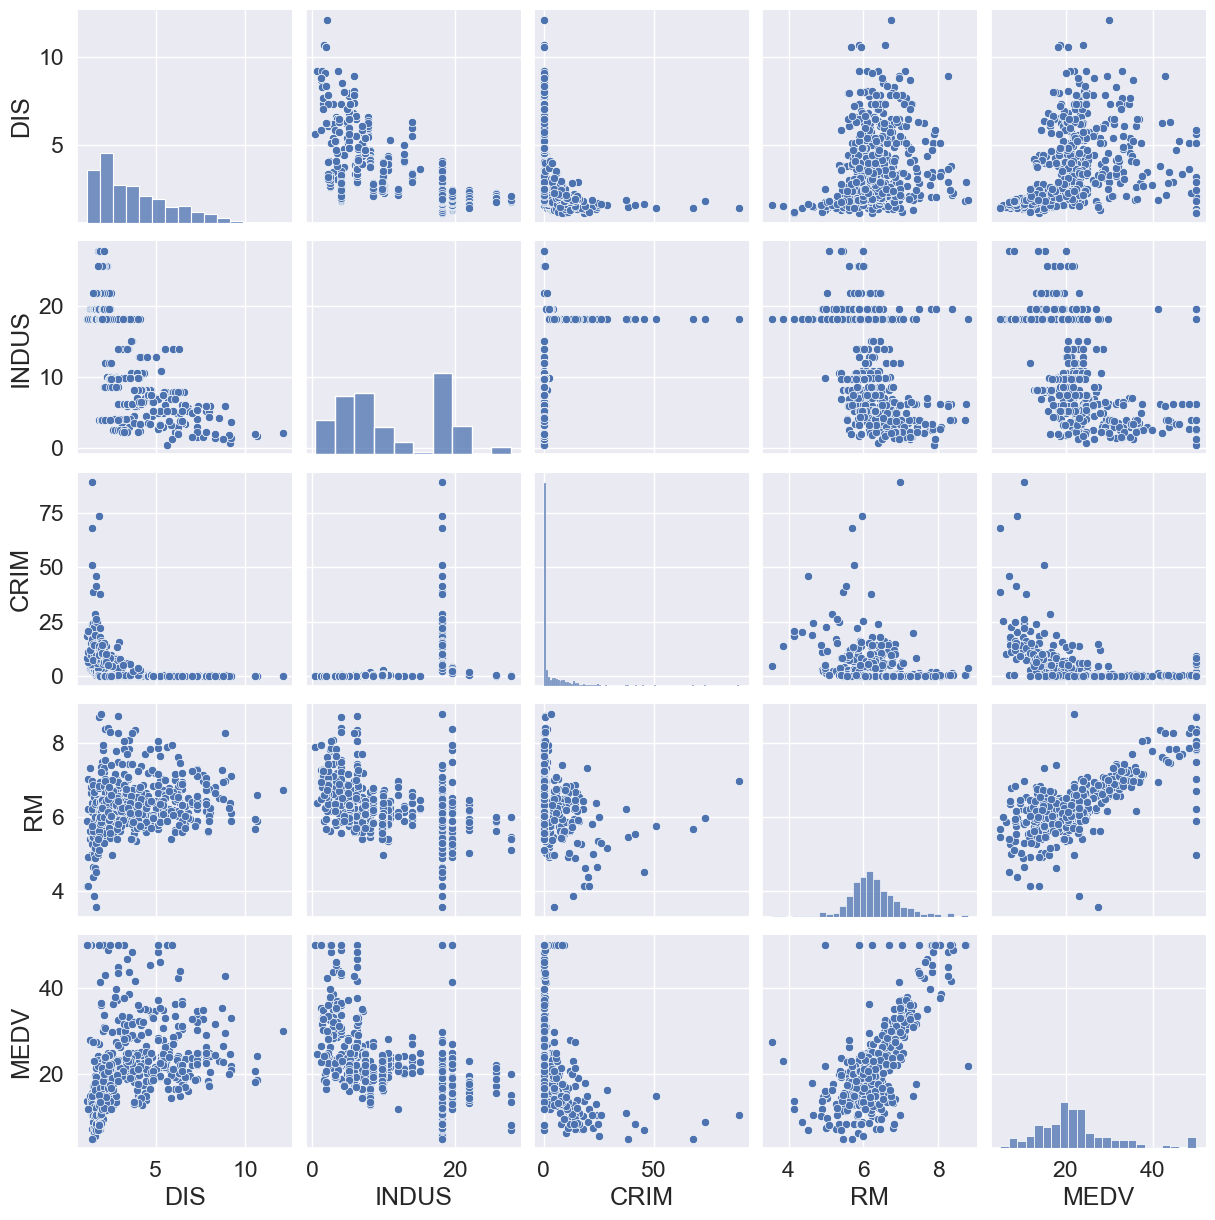

In [18]:
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]
sns.pairplot(df[cols], height=2.5)
plt.show()

In [19]:
X = df[["RM", "INDUS"]].values
y = df["MEDV"].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

print(X_std.shape, y_std.shape)

slr = LinearRegression()
slr.fit(X_std, y_std)

(506, 2) (506, 1)


LinearRegression()

In [20]:
from mpl_toolkits.mplot3d import *
import plotly.express as px
import plotly.graph_objects as go

In [21]:
# PLOTTING
mesh_size = .02
margin = 0

# Create a mesh grid on which we will run our model
x1_min, x1_max = X[:,0].min() - margin, X[:,0].max() + margin
x2_min, x2_max = X[:,1].min() - margin, X[:,1].max() + margin
x1range = np.arange(x1_min, x1_max, mesh_size)
x1range = np.arange(x2_min, x2_max, mesh_size)
X1, X2 = np.meshgrid(x1range, x1range)

plane = pd.DataFrame(dict(
        RM=X1.ravel(),
        INDUS=X2.ravel()
    )
)


# Run model
pred = slr.predict(plane).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

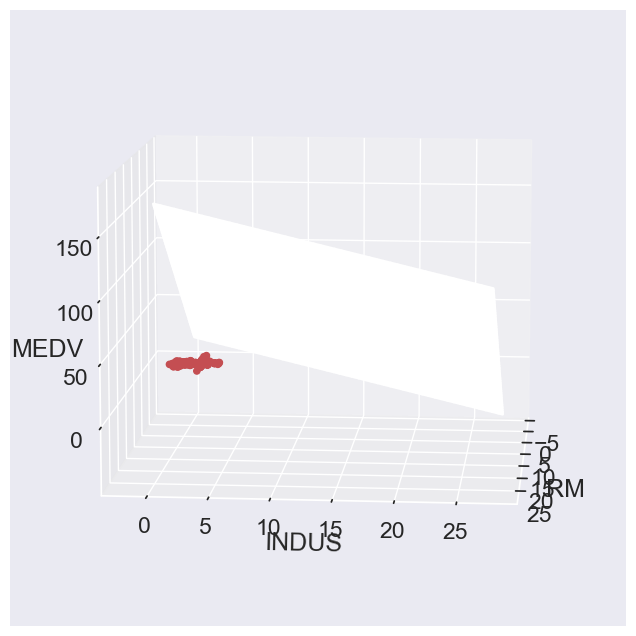

In [22]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X1, X2, pred, alpha=0.4, linewidth=2)
ax.scatter3D(X_std[:,0],X_std[:,1],y_std, color='r',alpha=1)
ax.view_init(elev=10,azim=5)
ax.set_xlabel('RM')
ax.set_ylabel('INDUS')
ax.set_zlabel('MEDV')
plt.show()

In [23]:
showPlot = False
# Generate the plot
if showPlot:
    fig = px.scatter_3d(df, x='RM', y='INDUS', z='MEDV')
    fig.update_traces(marker=dict(size=5))
    fig.add_traces(go.Surface(x=x1range, y=x1range, z=pred, name='pred_surface'))
    fig.show()

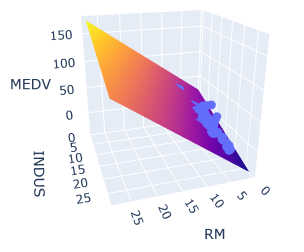

## Predecir gastos medicos

Se estará utilizando los datos del [Us Census Bureau](https://www.kaggle.com/datasets/mirichoi0218/insurance).

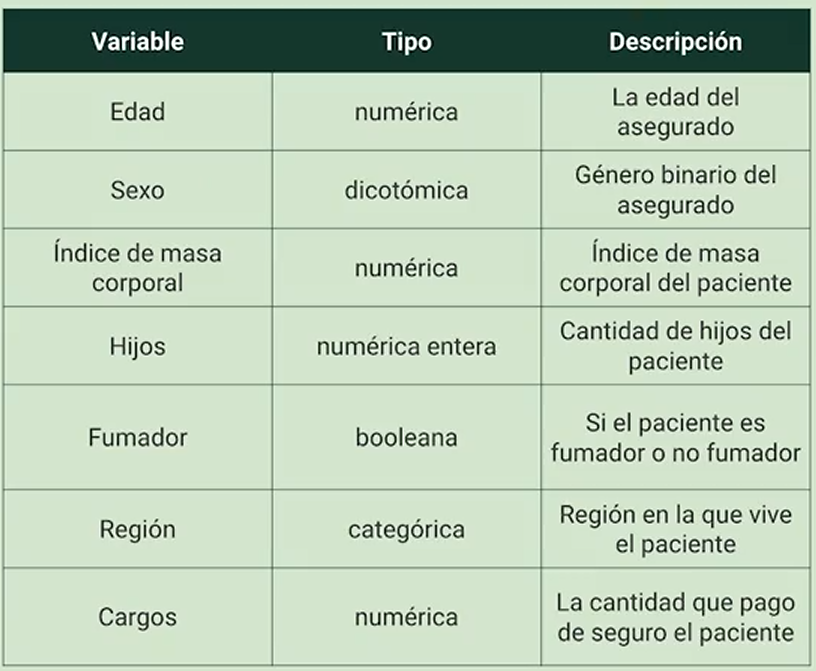

In [24]:
data = pd.read_csv("./data/insurance.csv")
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [25]:
data.shape

(1338, 7)

### Analizando los datos

Se observa que los datos no se ajustan a una distribución y que aparentemente hay valores atípicos, por lo que vmos a revisar estos datos

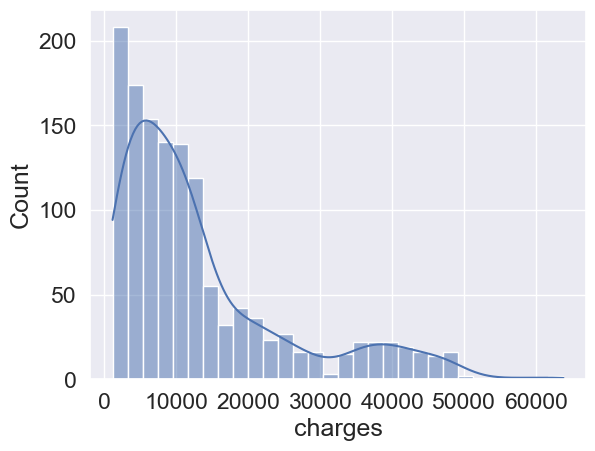

In [26]:
sns.histplot(data, x="charges", kde=True)
plt.show()

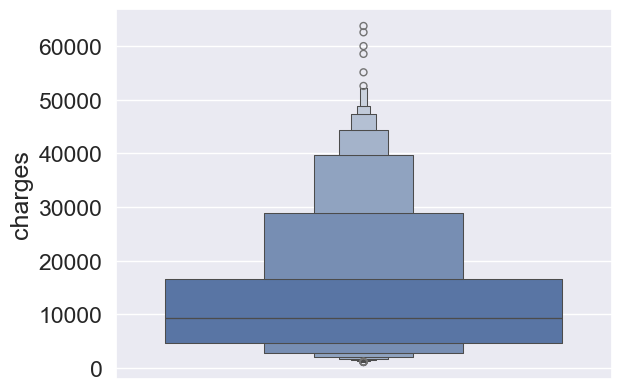

In [27]:
sns.boxenplot(data, y="charges")
plt.show()

En este caso se decide eliminar ciertos datos atípicos para evitar cesgo, por el momento solo los que estén sobre 50000

In [28]:
data = data[data["charges"] < 50000]

#### Observando correlaciones

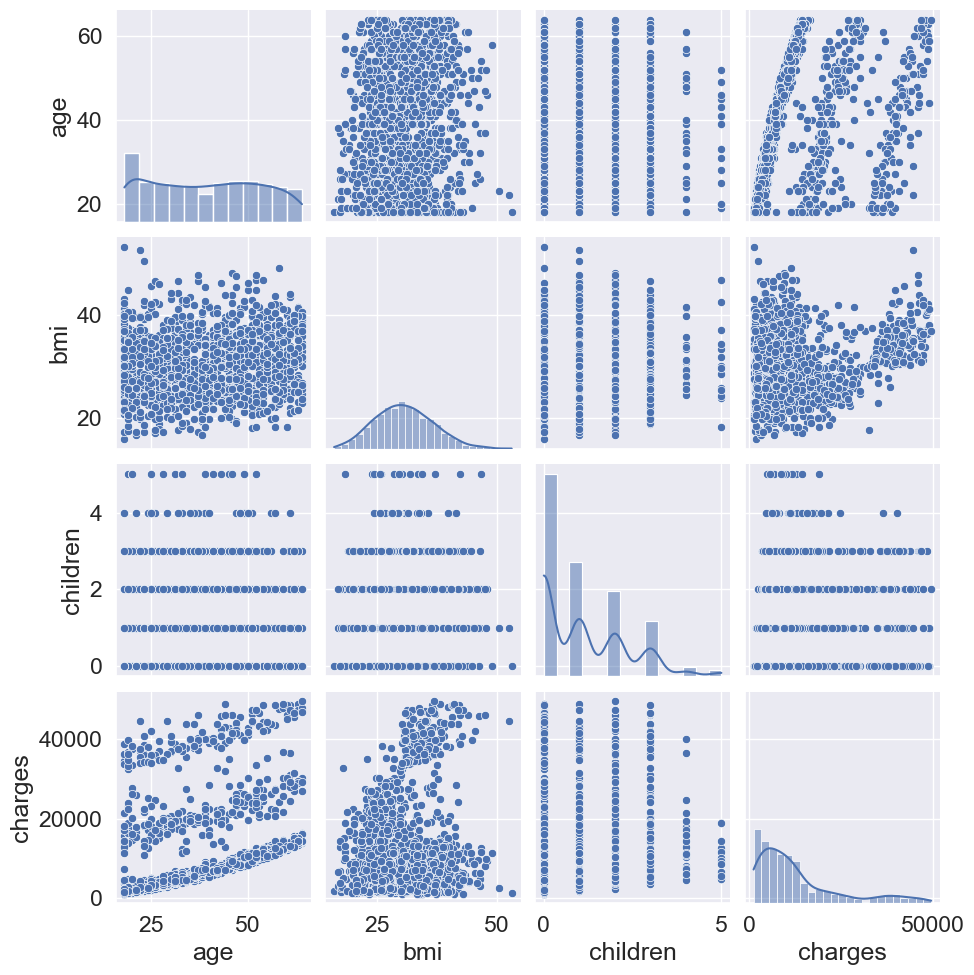

In [29]:
sns.pairplot(data, height=2.5,
             diag_kws={"kde":True})
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


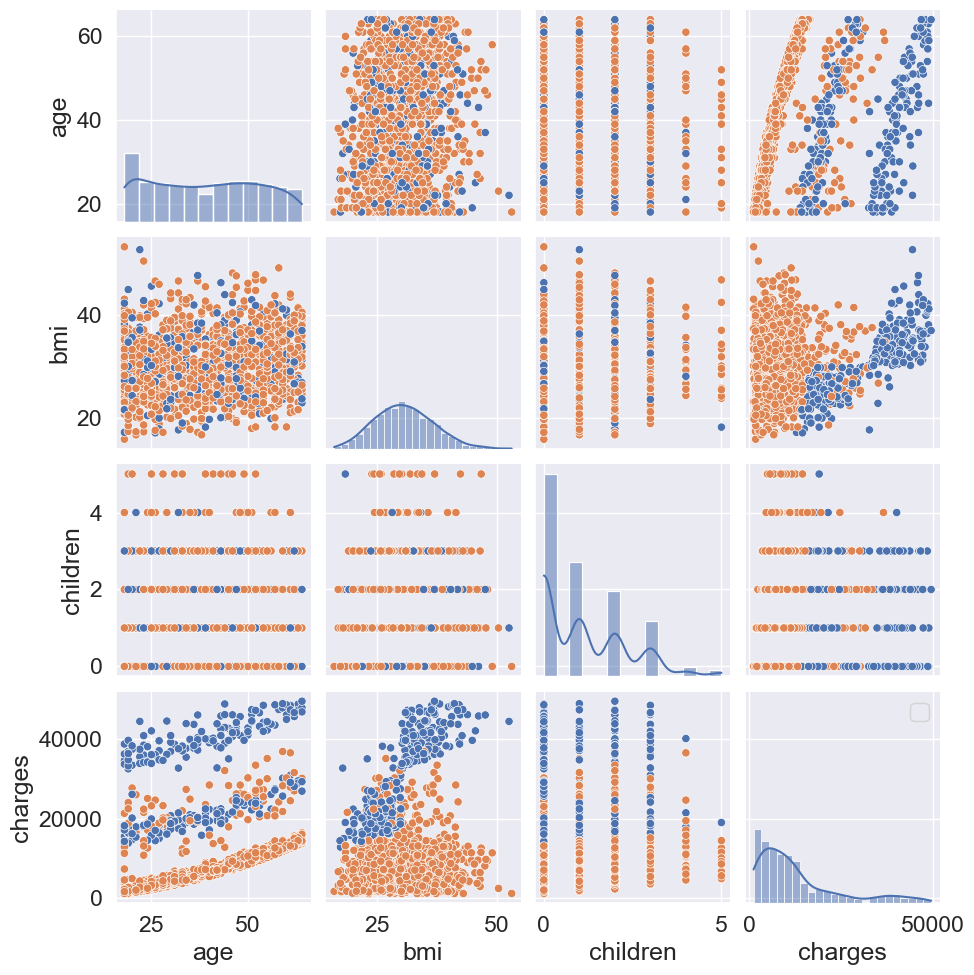

In [30]:
sns.pairplot(data, height=2.5,
             diag_kws={"kde":True},
             plot_kws={"hue":data["smoker"]},
             grid_kws={"hue_kws":{"corner":True}})
plt.legend()
plt.show()

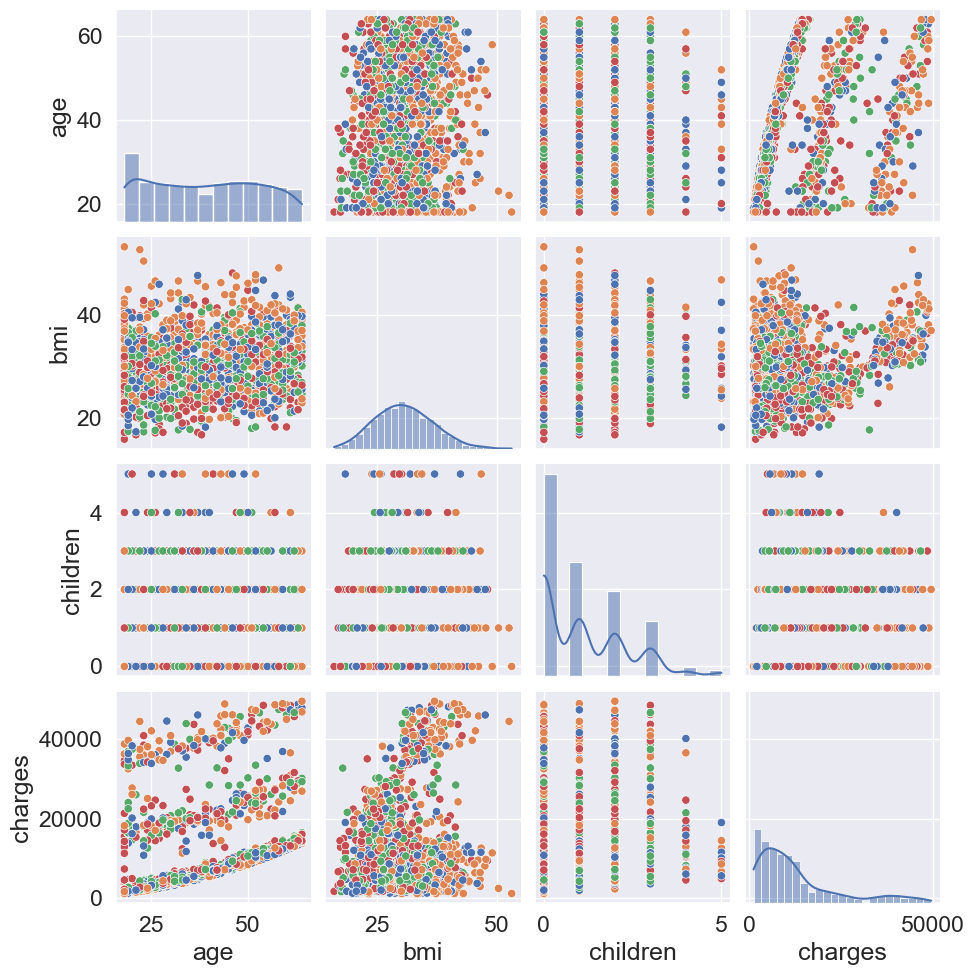

In [31]:
sns.pairplot(data, height=2.5,
             diag_kws={"kde":True},
             plot_kws={"hue":data["region"]})
plt.show()

<Axes: >

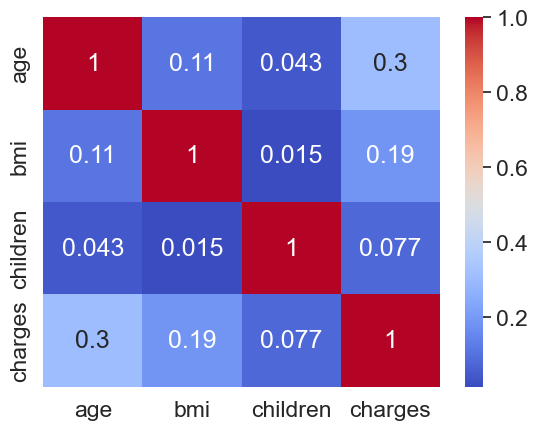

In [32]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")

##### Pasar las variables categóricas a numéricas

In [33]:
data = pd.get_dummies(data, columns=["sex", "smoker", "region"],
               drop_first=True # Elimina la redundancia de las columnas
               )
data.head()

age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False

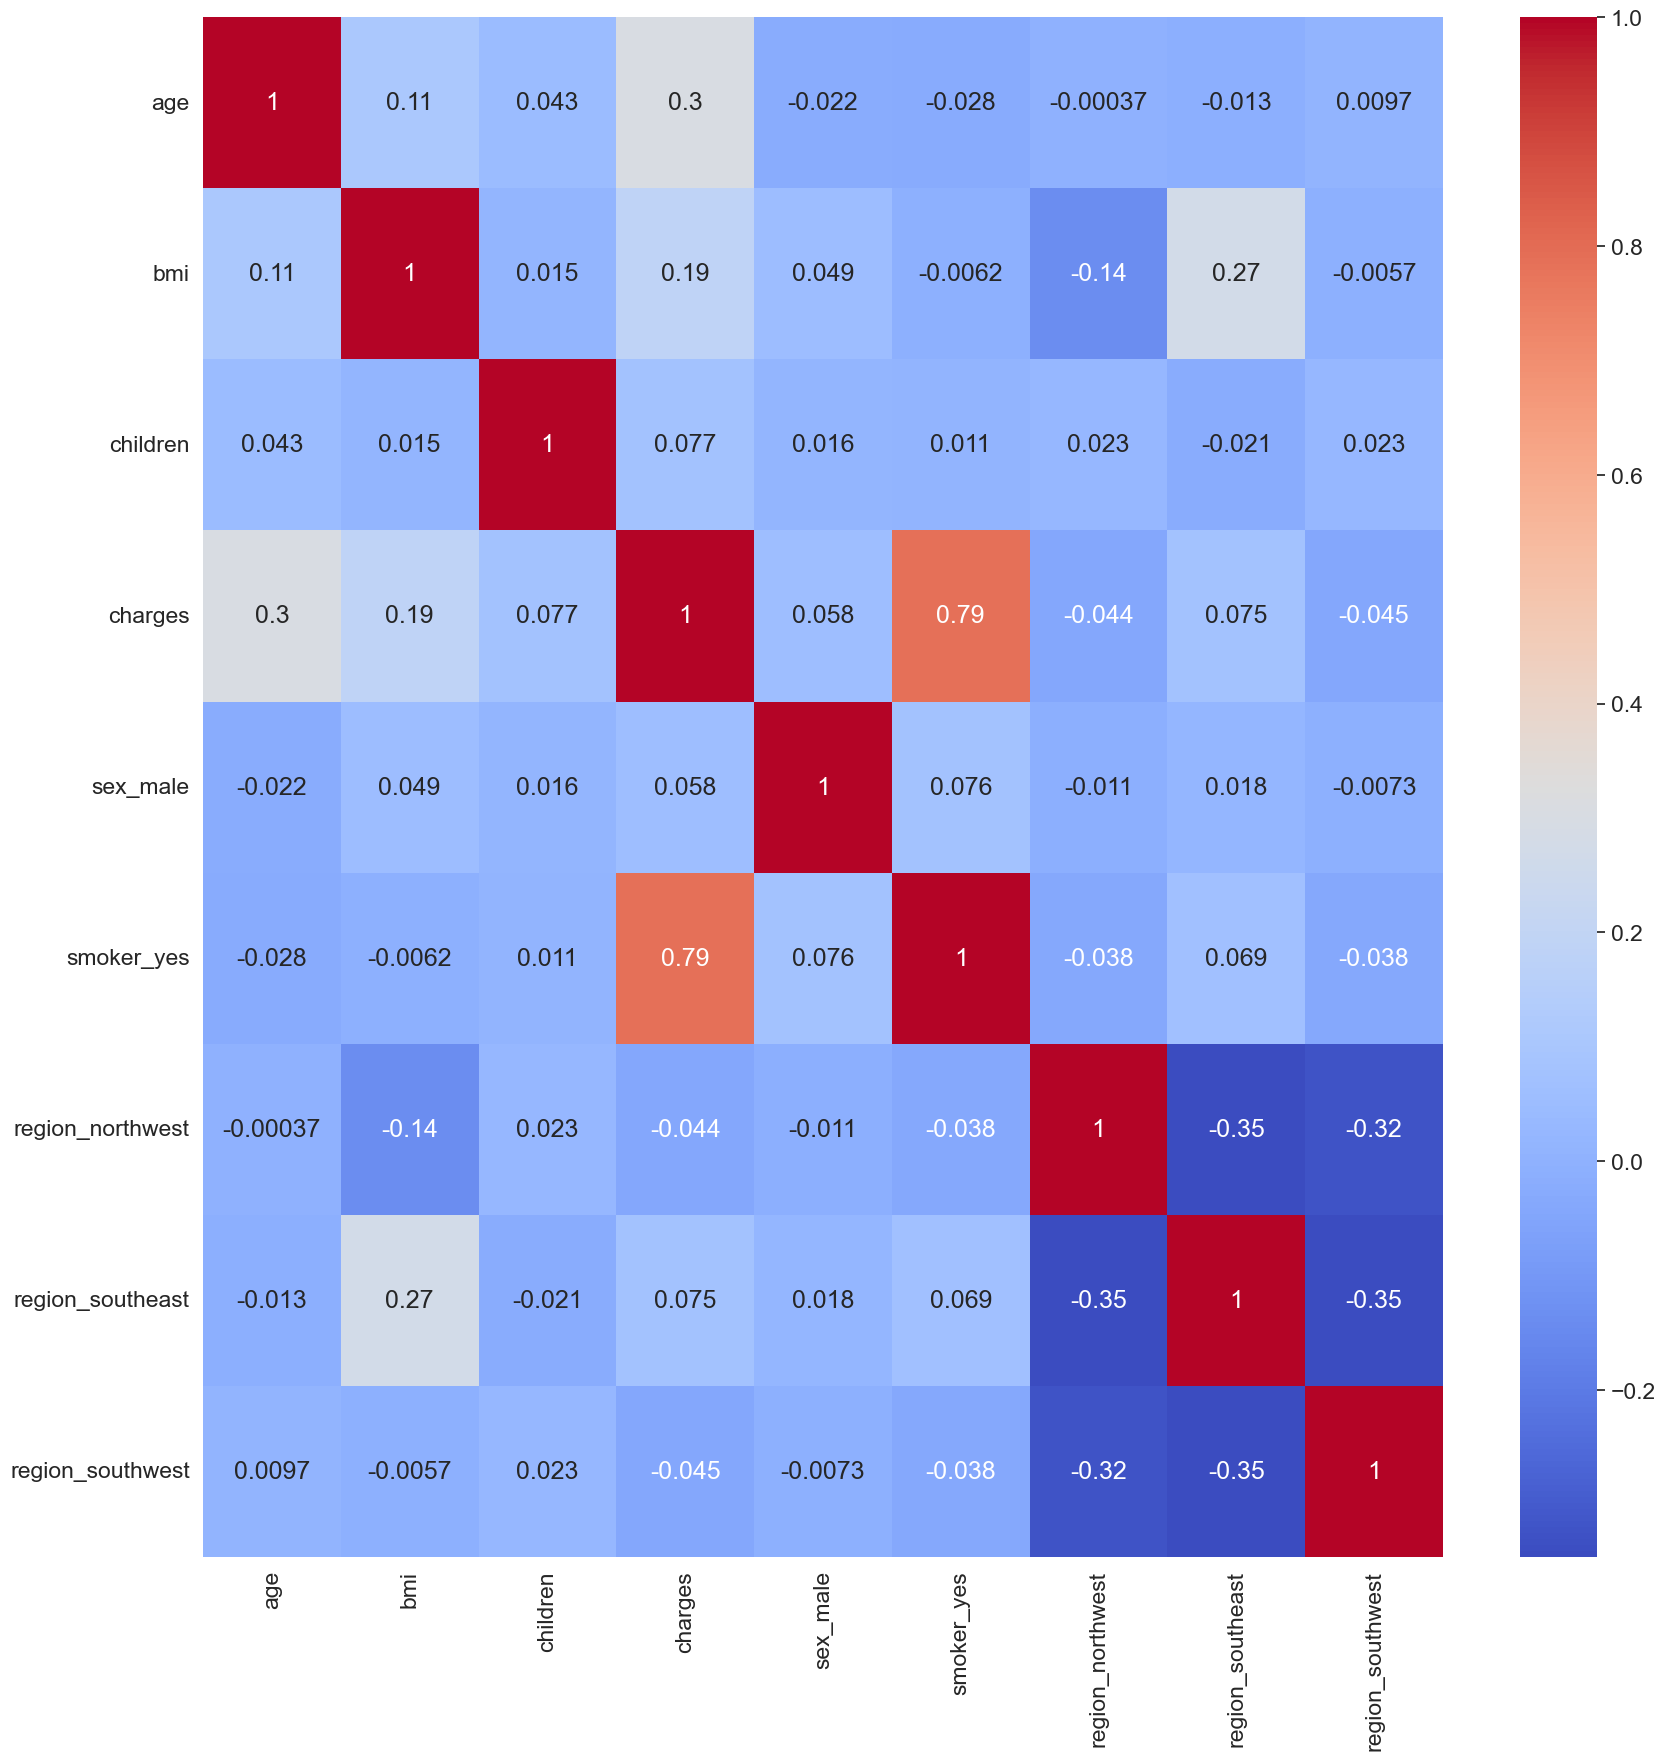

In [34]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

### Creando modelos

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = data.drop(columns = ['charges'])
y = data[['charges']]

Dividir los datos

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Estandarizar los datos

In [38]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

Crear el modelo, entrenar y predecir

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [40]:
y_pred.shape

(333, 1)

#### Métricas

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
mse = mean_squared_error(y_test, y_pred)
mse

0.26244200673335016

In [43]:
r2 = r2_score(y_test, y_pred)
r2

0.7459857648811968

Resumen general

In [44]:
from regressors import stats

In [45]:
model.intercept_

array([2.70100926e-17])

In [46]:
model.coef_

array([[ 2.90171650e-01,  1.54538865e-01,  6.07983379e-02,
        -3.58872329e-04,  7.99655400e-01, -1.33055310e-02,
        -1.80405297e-02, -3.26471492e-02]])

In [47]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [48]:
y_test = y_test.reshape(-1)

print("=========================Summary=========================")
stats.summary(model, X_test, y_test, data.columns.drop("charges"))

=========================Summary=========================
Residuals:
    Min      1Q  Median     3Q    Max
-2.1171 -0.0978  0.0862 0.2183 0.9775


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.000000    0.028331   0.0000  1.000000
age               0.290172    0.029171   9.9473  0.000000
bmi               0.154539    0.028814   5.3633  0.000000
children          0.060798    0.027702   2.1948  0.028873
sex_male         -0.000359    0.028501  -0.0126  0.989961
smoker_yes        0.799655    0.028112  28.4450  0.000000
region_northwest -0.013306    0.032441  -0.4101  0.681965
region_southeast -0.018041    0.034176  -0.5279  0.597938
region_southwest -0.032647    0.033428  -0.9766  0.329465
---
R-squared:  0.74599,    Adjusted R-squared:  0.73971
F-statistic: 118.94 on 8 features


Graficamos que tan lejos están los datos predichos de los reales

Mientra más cerca del 0, mejor

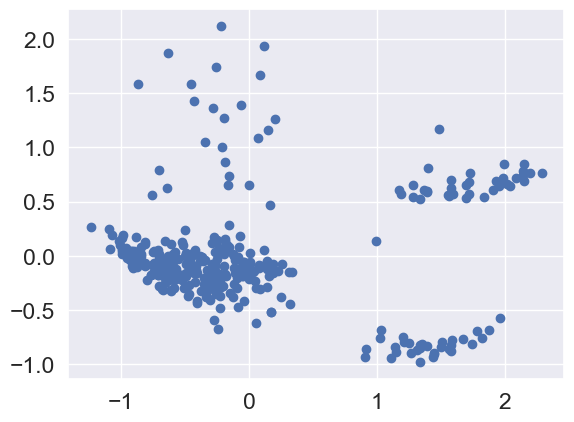

In [49]:
residuals = y_test - y_pred.reshape(-1)
plt.scatter(y_pred, residuals)
plt.show()

### Mejorar el modelo

Contar con todas las variables candidatas no siempre es lo mejor ni lo más optimo, por lo que es bueno eliminar ciertas variables

In [50]:
data_2 = data.copy()

data_2["age2"] = data_2["age"] ** 2
data_2["sobrepeso"] = (data_2["bmi"] >= 30).astype(int)
data_2["sobrepeso*fumador"] = data_2["sobrepeso"] * data_2["smoker_yes"]

In [51]:
X = data_2.drop(columns = ['charges'])
y = data_2[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"$R^2$: {r2}")

model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print("=========================Summary=========================")
stats.summary(model, X_test, y_test, data_2.columns.drop("charges"))

MSE: 0.12999162680842266
$R^2$: 0.8881188521146461
=========================Summary=========================
Residuals:
    Min    1Q  Median     3Q    Max
-1.9407 0.034  0.1045 0.1435 0.3133


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.020113   0.0000  1.000000
age               -0.029870    0.103499  -0.2886  0.773068
bmi                0.067416    0.028972   2.3269  0.020571
children           0.065726    0.021116   3.1126  0.002016
sex_male          -0.007979    0.019954  -0.3999  0.689521
smoker_yes         0.460281    0.023809  19.3325  0.000000
region_northwest  -0.019413    0.023038  -0.8426  0.400044
region_southeast  -0.049366    0.024289  -2.0324  0.042908
region_southwest  -0.053565    0.023398  -2.2893  0.022689
age2               0.361719    0.103610   3.4912  0.000546
sobrepeso         -0.031047    0.031115  -0.9978  0.319084
sobrepeso*fumador  0.482570    0.025587  18.8600  0.000000
---
R-squared:  0.88812, 

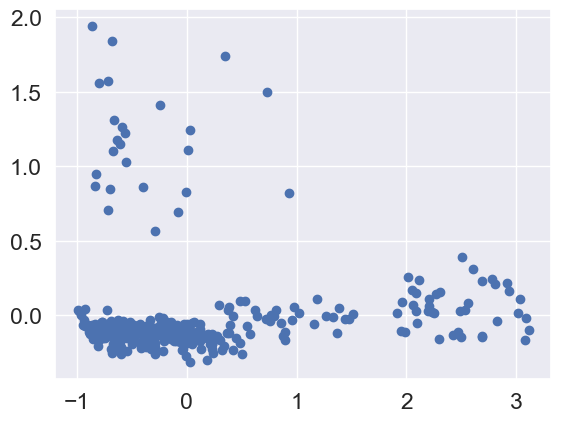

In [52]:
residuals = y_test - y_pred.reshape(-1)
plt.scatter(y_pred, residuals)
plt.show()

Eliminaremos las columnas que tengan un p-value mayor a 0.05

In [53]:
cols = ["sobrepeso*fumador", "smoker_yes", "age2", "children"]
X = data_2[cols]
y = data_2[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"$R^2$: {r2}")

model.coef_ = model.coef_.reshape(-1)

y_test = y_test.reshape(-1)

print("=========================Summary=========================")
stats.summary(model, X_test, y_test, cols)

MSE: 0.17988078426941495
$R^2$: 0.8344780064247476
=========================Summary=========================
Residuals:
    Min    1Q  Median     3Q    Max
-2.0855 0.056  0.0962 0.1279 0.4081


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.023305   0.0000  1.000000
sobrepeso*fumador  0.496527    0.028416  17.4737  0.000000
smoker_yes         0.457556    0.029866  15.3201  0.000000
age2               0.330059    0.021915  15.0609  0.000000
children           0.078349    0.023410   3.3468  0.000911
---
R-squared:  0.83448,    Adjusted R-squared:  0.83246
F-statistic: 413.40 on 4 features


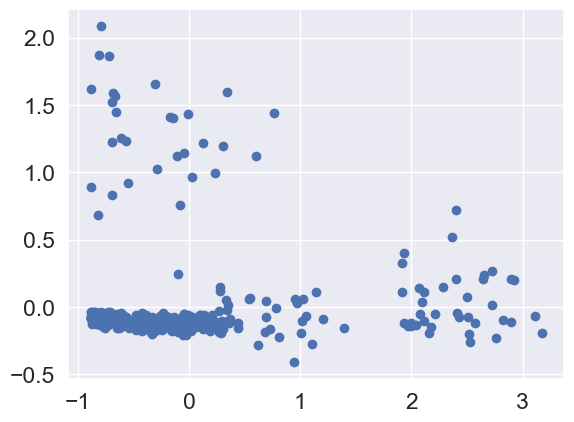

In [54]:
residuals = y_test - y_pred.reshape(-1)
plt.scatter(y_pred, residuals)
plt.show()

#### Usando forward

In [85]:
data_3 = data.copy()

X = data_3.drop(columns = ['charges'])
y = data_3[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [86]:
from sklearn.feature_selection import RFE

# Creamos el modelo de regresión lineal
lr = LinearRegression()

# Creamos el objeto RFE
rfe = RFE(lr, n_features_to_select=None, step=1)

# Aplicamos el método forward
rfe.fit(X_train, y_train)

# Obtenemos las variables independientes seleccionadas
selected_features = data.columns.drop("charges")[rfe.get_support()]
selected_features

Index(['age', 'bmi', 'children', 'smoker_yes'], dtype='object')

In [87]:
X = data_3[selected_features]
y = data_3[['charges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred = model.predict(X_test)

In [89]:
mean_squared_error(y_test, y_pred)

0.22039596158566227

In [90]:
r2_score(y_test, y_pred)

0.7734098749039588

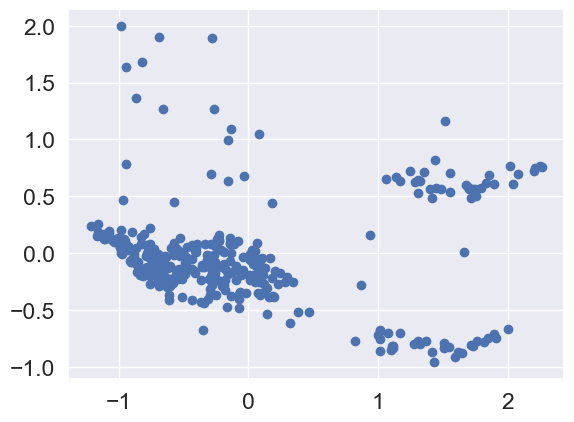

In [91]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.show()